In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
from sklearn.cluster import KMeans

data = pandas.read_csv('data.tsv', sep="\t", header=None, names=['date', 'id', 'type', 'hash', 'latitude', 'longitude'])
route_to_stops_count = pandas.read_csv('route_to_stops_count.tsv', sep="\t", header=None, names=['hash', 'num'])
debug = pandas.read_csv('debug.tsv', sep="\t", header=None, names=['type', 'hash', 'latitude', 'longitude'])

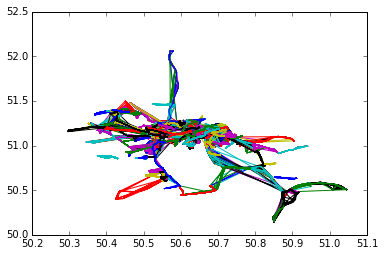

In [29]:
len_num = len(data["id"].unique())
for id in data["id"].unique():
    t = data[data["id"] == id]
    plt.plot(t['latitude'], t['longitude'])       

    

In [4]:
x = route_to_stops_count[route_to_stops_count["hash"] == 86]
k_means = KMeans(n_clusters = x["num"][0])
data_bus = data[data["hash"] == 86]
coor = data_bus[['latitude', 'longitude']]
k_means.fit(coor)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=47, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

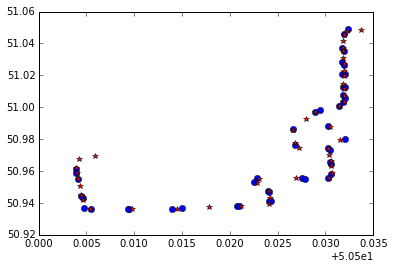

In [7]:
t = debug[(debug["hash"] == 86) & (debug["type"] == "bus")]
plt.plot(t['latitude'], t['longitude'], 'o') 

plt.plot(*zip(*k_means.cluster_centers_), marker='*', color='r', ls='')

In [30]:
routes = []
num = route_to_stops_count["num"].unique()
hashes = data["hash"].unique()

for hash in hashes:
    stops_count = route_to_stops_count[route_to_stops_count["hash"] == hash]["num"]

    print(stops_count)
    print()
    
    kmeans = KMeans(n_clusters=int(stops_count))
    data_bus = data[data["hash"] == hash]   
    coor = data_bus[['latitude', 'longitude']]


    if (len(coor) != 0 ):
        kmeans.fit(coor)
        X = [x for (x, y) in kmeans.cluster_centers_]
        Y = [y for (x, y) in kmeans.cluster_centers_]
        array = [(X, Y)]
        routes.append(array)  


tramway    49
Name: num, dtype: int64

tramway    35
Name: num, dtype: int64

tramway       56
trolleybus    64
bus           48
Name: num, dtype: int64



TypeError: cannot convert the series to <class 'int'>